Import Libraries

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV


Load and Explore the Dataset


In [11]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
df = pd.DataFrame(data=np.c_[X, y], columns=iris.feature_names + ['target'])

# Display the first few rows of the dataframe
print(df.head())

# Basic statistics
print(df.describe())

# Target class distribution
print(df['target'].value_counts())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000  

 Data Visualization

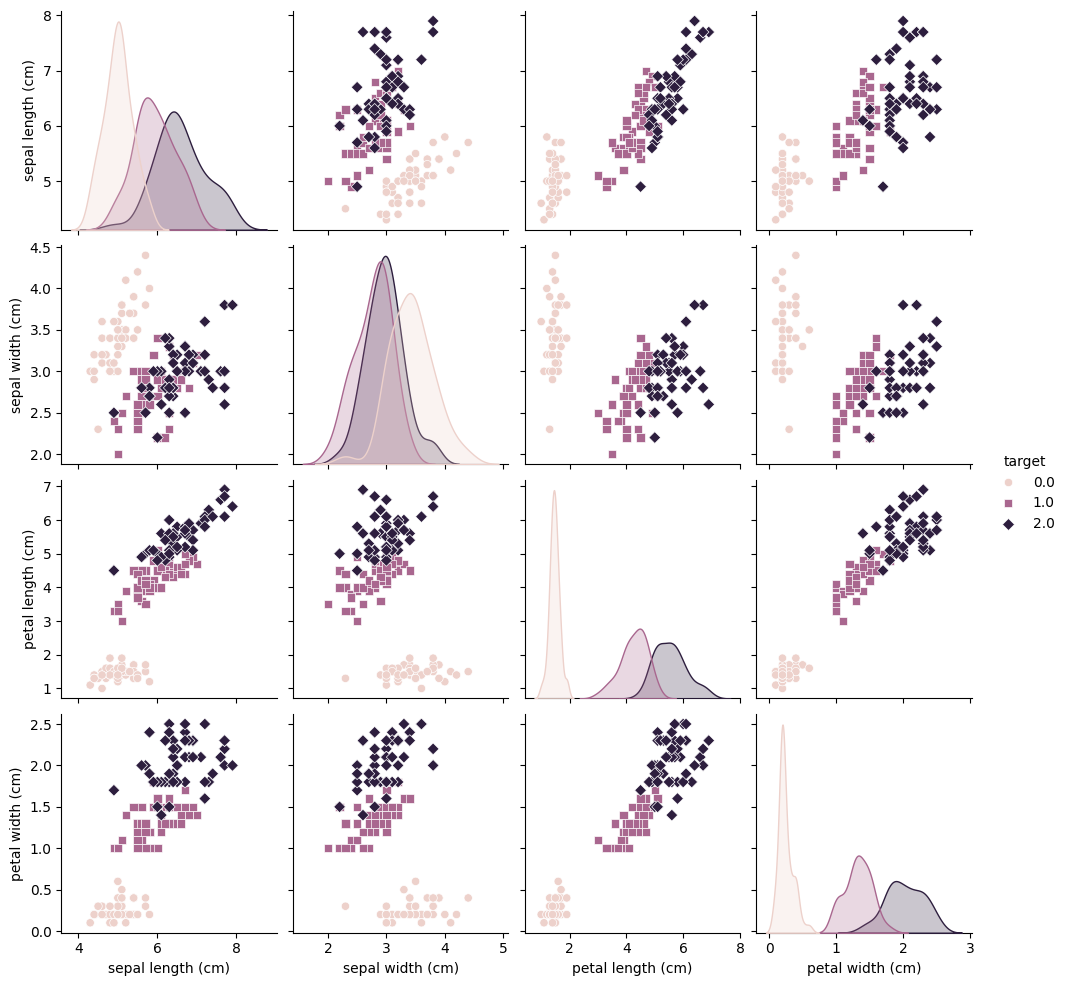

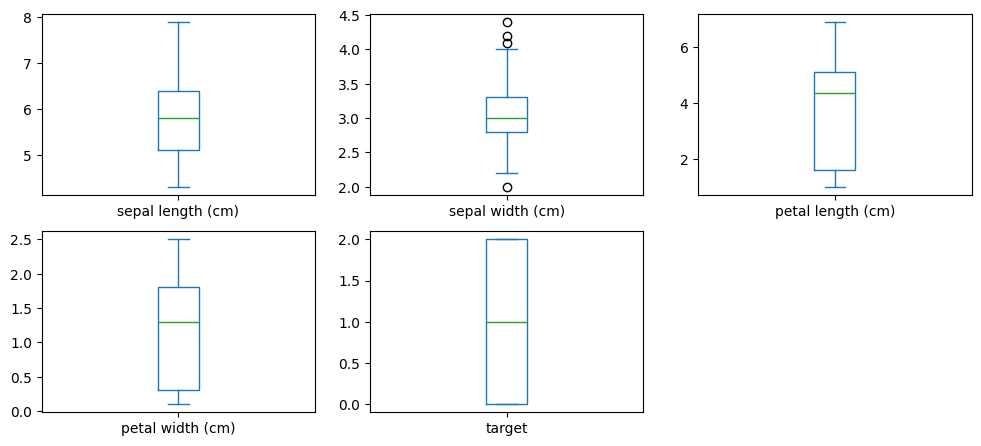

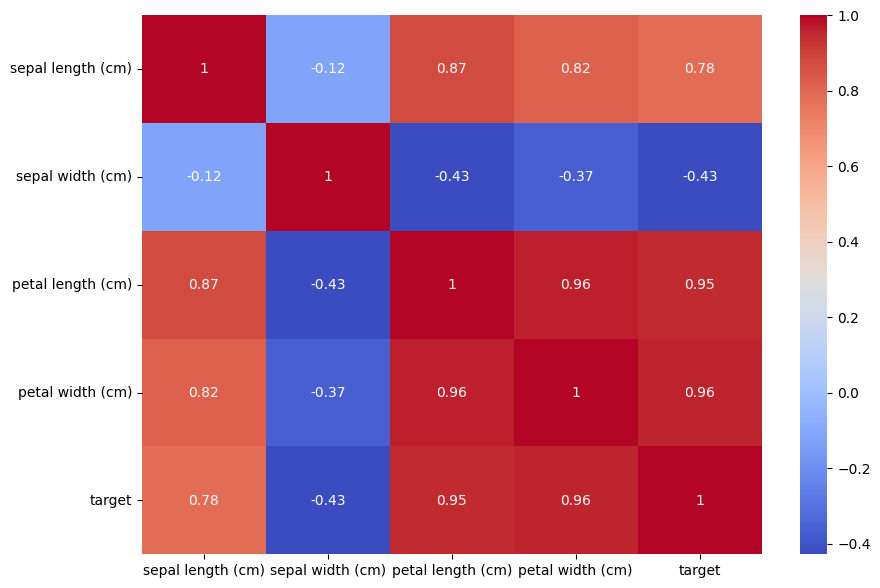

In [13]:
# Pair plot
sns.pairplot(df, hue='target', markers=["o", "s", "D"])
plt.show()

# Boxplot
df.plot(kind='box', subplots=True, layout=(3, 3), sharex=False, sharey=False, figsize=(12, 8))
plt.show()

# Heatmap for correlation
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


Data Preprocessing

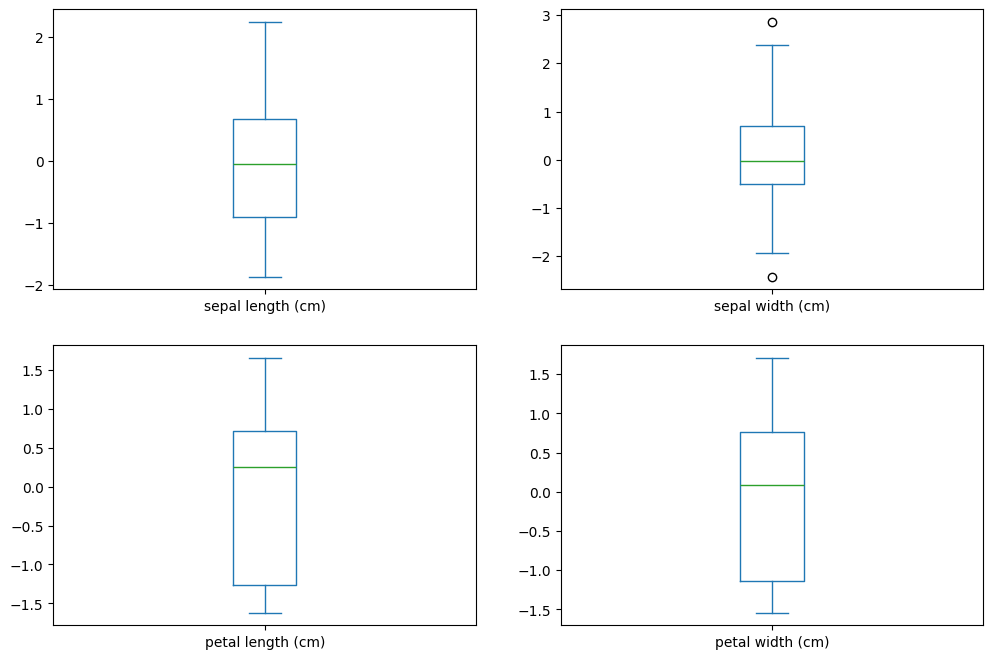

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Visualize the scaled features
scaled_df = pd.DataFrame(X_train, columns=iris.feature_names)
scaled_df.plot(kind='box', subplots=True, layout=(2, 2), sharex=False, sharey=False, figsize=(12, 8))
plt.show()


 Model Training

In [15]:
# Initialize and train the k-NN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

Model Evaluation

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


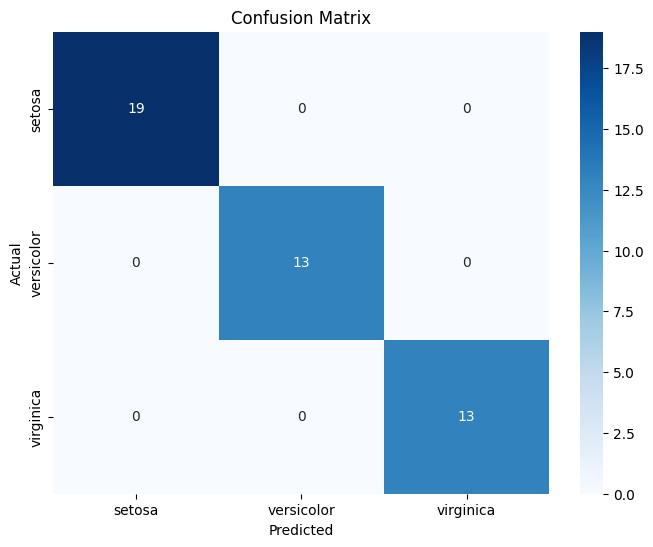

In [16]:
# Make predictions on the testing set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=iris.target_names))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


 Hyperparameter Tuning

Best parameters: {'n_neighbors': 3}
Best score: 0.9428571428571428


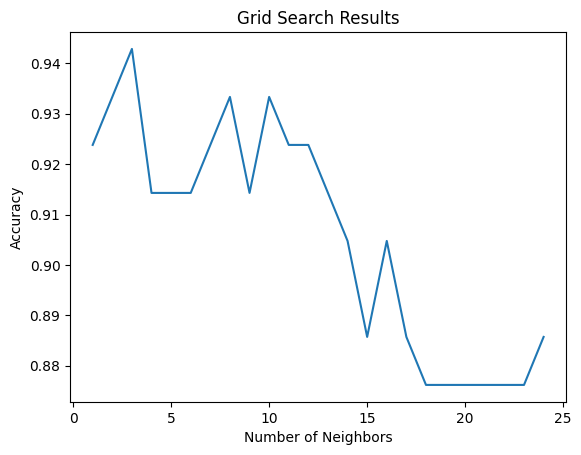

In [17]:
# Define the parameter grid
param_grid = {'n_neighbors': np.arange(1, 25)}

# Initialize the GridSearchCV object
knn_gscv = GridSearchCV(knn, param_grid, cv=5)

# Fit it to the data
knn_gscv.fit(X_train, y_train)

# Print the best parameters and score
print(f'Best parameters: {knn_gscv.best_params_}')
print(f'Best score: {knn_gscv.best_score_}')

# Visualize the grid search results
results = pd.DataFrame(knn_gscv.cv_results_)
plt.plot(results['param_n_neighbors'], results['mean_test_score'])
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('Grid Search Results')
plt.show()


Retrain and Evaluate the Optimized Model

Optimized Accuracy: 1.0
Optimized Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Optimized Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


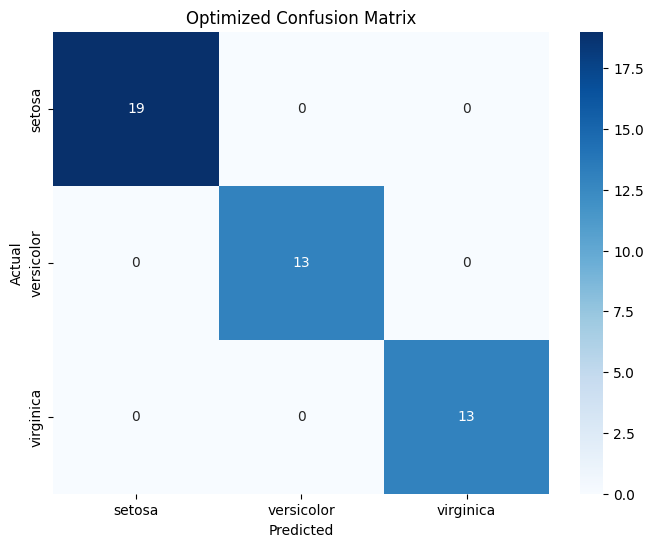

In [18]:
# Train the optimized model
knn_optimized = KNeighborsClassifier(n_neighbors=knn_gscv.best_params_['n_neighbors'])
knn_optimized.fit(X_train, y_train)

# Make predictions with the optimized model
y_pred_optimized = knn_optimized.predict(X_test)

# Evaluate the optimized model
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
print(f'Optimized Accuracy: {accuracy_optimized}')
print('Optimized Classification Report:')
print(classification_report(y_test, y_pred_optimized, target_names=iris.target_names))
print('Optimized Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_optimized))

# Plot optimized confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_optimized), annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Optimized Confusion Matrix')
plt.show()


In [ ]:
!pip install tensorflow

In [ ]:
!pip install keras